<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
len(df[df.duplicated()])

20

In [7]:
df.duplicated().sum()

np.int64(20)

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
# Identify duplicate rows based on specified columns
duplicate_rows = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]

print("Duplicate rows based on MainBranch, Employment, and RemoteWork:")
print(duplicate_rows)


Duplicate rows based on MainBranch, Employment, and RemoteWork:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Emplo

In [9]:
# Find duplicate rows based on specific columns
duplicates = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]

# Filter columns to analyze for identical values
analysis_columns = ['MainBranch', 'Employment', 'RemoteWork']
identical_values = duplicates[analysis_columns].drop_duplicates()

print("Columns that contain identical values within duplicate rows:")
print(identical_values)


Columns that contain identical values within duplicate rows:
                                              MainBranch  \
0                         I am a developer by profession   
3                                  I am learning to code   
4                         I am a developer by profession   
5                            I code primarily as a hobby   
6      I am not primarily a developer, but I write co...   
...                                                  ...   
54630  I used to be a developer by profession, but no...   
56449                              I am learning to code   
58083                        I code primarily as a hobby   
61424                        I code primarily as a hobby   
64419  I am not primarily a developer, but I write co...   

                                              Employment  \
0                                    Employed, full-time   
3                                     Student, full-time   
4                                     

In [10]:
# Define the subset of columns to check for duplicates
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Find duplicate rows based on the subset of columns
duplicates = df[df.duplicated(subset=subset_columns, keep=False)]

# Analyze the characteristics of duplicate rows
analysis = duplicates.groupby(subset_columns).size().reset_index(name='Count')

# Display the analysis
print(analysis)


                                            MainBranch  \
0                       I am a developer by profession   
1                       I am a developer by profession   
2                       I am a developer by profession   
3                       I am a developer by profession   
4                       I am a developer by profession   
..                                                 ...   
314  I used to be a developer by profession, but no...   
315  I used to be a developer by profession, but no...   
316  I used to be a developer by profession, but no...   
317  I used to be a developer by profession, but no...   
318  I used to be a developer by profession, but no...   

                                            Employment  \
0                                  Employed, full-time   
1                                  Employed, full-time   
2                                  Employed, full-time   
3              Employed, full-time;Employed, part-time   
4            

In [11]:
# Function to find columns with identical values across rows
def find_identical_columns(df, columns):
    identical_columns = []
    for col in columns:
        if df[col].nunique() == 1:
            identical_columns.append(col)
    return identical_columns

# Columns to check
columns_to_check = ['MainBranch', 'Employment', 'RemoteWork']

# Determine identical columns
identical_columns = find_identical_columns(df, columns_to_check)

print("Columns with identical values across rows:", identical_columns)

Columns with identical values across rows: []


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_1626/2799510064.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MainBranch', y='Count', data=mainbranch_counts, palette='viridis')


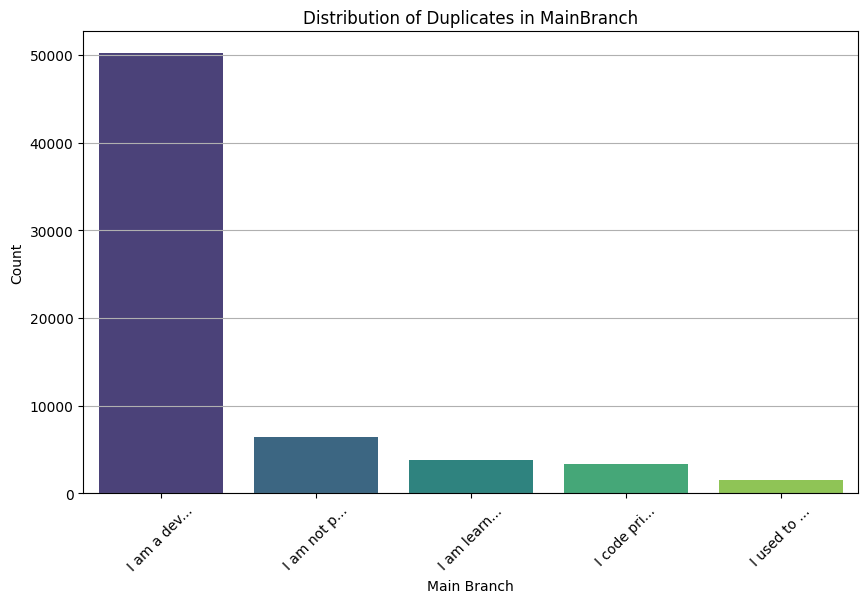

/tmp/ipykernel_1626/2799510064.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employment', y='Count', data=employment_counts, palette='plasma')


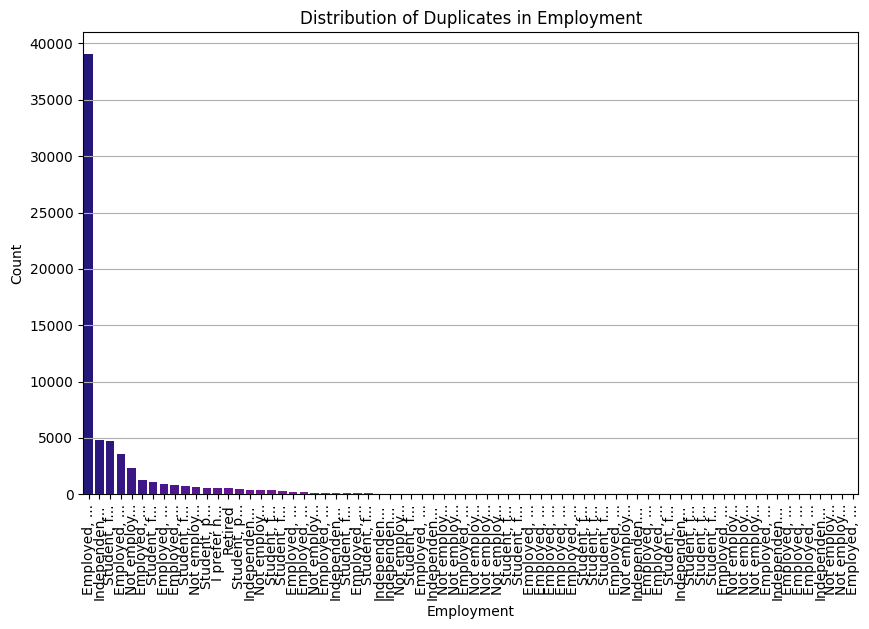

/tmp/ipykernel_1626/2799510064.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RemoteWork', y='Count', data=remotework_counts, palette='magma')


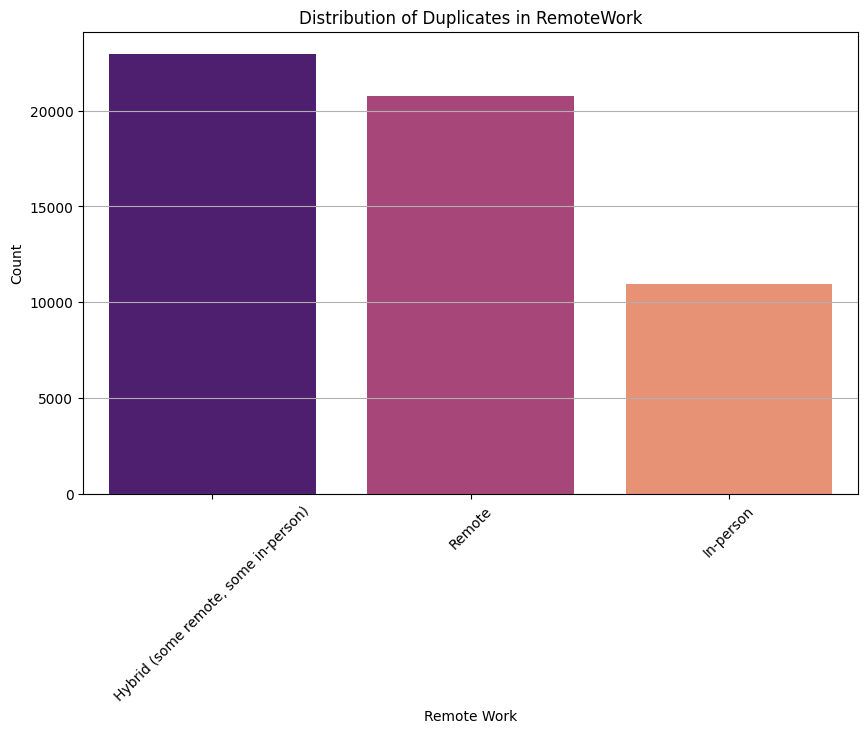

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicates
df_duplicates = df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)
df = df[df_duplicates]

# Calculate the counts for each category
mainbranch_counts = df['MainBranch'].value_counts().reset_index()
mainbranch_counts.columns = ['MainBranch', 'Count']

employment_counts = df['Employment'].value_counts().reset_index()
employment_counts.columns = ['Employment', 'Count']

remotework_counts = df['RemoteWork'].value_counts().reset_index()
remotework_counts.columns = ['RemoteWork', 'Count']

# Define a function to shorten the labels
def shorten_labels(labels, max_length=10):
    return [label if len(label) <= max_length else label[:max_length] + '...' for label in labels]

# Plotting the distribution of duplicates for MainBranch
plt.figure(figsize=(10, 6))
sns.barplot(x='MainBranch', y='Count', data=mainbranch_counts, palette='viridis')
plt.title('Distribution of Duplicates in MainBranch')
plt.xlabel('Main Branch')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(mainbranch_counts['MainBranch'])),
           labels=shorten_labels(mainbranch_counts['MainBranch'].values))
plt.grid(axis='y')
plt.show()

# Plotting the distribution of duplicates for Employment
plt.figure(figsize=(10, 6))
sns.barplot(x='Employment', y='Count', data=employment_counts, palette='plasma')
plt.title('Distribution of Duplicates in Employment')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xticks(ticks=range(len(employment_counts['Employment'])),
           labels=shorten_labels(employment_counts['Employment'].values))
plt.grid(axis='y')
plt.show()

# Plotting the distribution of duplicates for RemoteWork
plt.figure(figsize=(10, 6))
sns.barplot(x='RemoteWork', y='Count', data=remotework_counts, palette='magma')
plt.title('Distribution of Duplicates in RemoteWork')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [15]:
# Subset of columns to check
columns_to_check = ['MainBranch', 'Employment', 'RemoteWork']

# Check for uniqueness
unique_count = df[columns_to_check].drop_duplicates().shape[0]
total_count = df.shape[0]
is_unique = unique_count == total_count

# Display results
if is_unique:
    print(f"The combination of columns {columns_to_check} is critical for defining uniqueness in the dataset.")
else:
    print(f"The combination of columns {columns_to_check} does NOT uniquely identify all rows in the dataset.")
    print(f"Unique rows based on {columns_to_check}: {unique_count}/{total_count}")


The combination of columns ['MainBranch', 'Employment', 'RemoteWork'] does NOT uniquely identify all rows in the dataset.
Unique rows based on ['MainBranch', 'Employment', 'RemoteWork']: 394/65290


In [16]:
# Subset of columns to use for identifying duplicates
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Remove duplicates based on the subset of columns
deduplicated_df = df.drop_duplicates(subset=subset_columns)

# Display results
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after deduplication: {deduplicated_df.shape[0]}")

# Save the deduplicated dataset to a new file (optional)
deduplicated_df.to_csv("deduplicated_dataset.csv", index=False)

print("\nDuplicates removed based on the subset of columns:", subset_columns)


Original number of rows: 65290
Number of rows after deduplication: 394

Duplicates removed based on the subset of columns: ['MainBranch', 'Employment', 'RemoteWork']


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
